In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns
from scipy.stats import iqr

%matplotlib inline
mpl.rcParams['figure.dpi']= 100

In [2]:
p = Path('./data').glob('*.csv')
paths = [x for x in p]

mapper = map(lambda x: pd.read_csv(x, parse_dates=['started_at', 'ended_at']), paths)
trip_data = list(mapper)

In [3]:
for x in trip_data:
    compare_columns = x.columns.isin(trip_data[0].columns)
    compare_columns_types = x.dtypes.isin(trip_data[0].dtypes)

if False in compare_columns:
    print('Column names are not the same')
else:
    print('Column names are the same')
    
if False in compare_columns_types:
    print('Column types are not the same')
else:
    print('Column types are the same')

Column names are the same
Column types are the same


In [4]:
all_trips = pd.concat(trip_data, ignore_index = True)
all_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667986 entries, 0 to 5667985
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 562.2+ MB


In [5]:
all_trips = all_trips.drop(columns = ['start_lat', 'start_lng', 'end_lat', 'end_lng'])

In [6]:
all_trips.nunique()

ride_id               5667986
rideable_type               3
started_at            4747127
ended_at              4740417
start_station_name        853
start_station_id          844
end_station_name          854
end_station_id            846
member_casual               2
dtype: int64

In [7]:
all_trips.apply(lambda x: x.unique())

ride_id               [CFA86D4455AA1030, 30D9DC61227D1AF3, 846D87A15...
rideable_type                [classic_bike, electric_bike, docked_bike]
started_at            [2021-03-16T08:32:30.000000000, 2021-03-28T01:...
ended_at              [2021-03-16T08:36:34.000000000, 2021-03-28T01:...
start_station_name    [Humboldt Blvd & Armitage Ave, Shields Ave & 2...
start_station_id      [15651, 15443, TA1308000021, 525, 13050, TA130...
end_station_name      [Stave St & Armitage Ave, Central Park Ave & B...
end_station_id        [13266, 18017, TA1308000043, 13323, E008, LF-0...
member_casual                                          [casual, member]
dtype: object

In [8]:
all_trips.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    712978
start_station_id      712975
end_station_name      761817
end_station_id        761817
member_casual              0
dtype: int64

In [9]:
all_trips['date'] = all_trips['started_at'].dt.date
all_trips['year'] = all_trips['started_at'].dt.year
all_trips['month'] = all_trips['started_at'].dt.month_name()
all_trips['day'] = all_trips['started_at'].dt.day
all_trips['day_of_the_week'] = all_trips['started_at'].dt.day_name()
all_trips['start_hour'] = all_trips['started_at'].dt.hour
all_trips['end_hour'] = all_trips['ended_at'].dt.hour
all_trips['weekday'] = all_trips['started_at'].dt.weekday < 5
all_trips['weekend'] = all_trips['started_at'].dt.weekday >= 5

In [10]:
all_trips['ride_length'] = (all_trips['ended_at'] - all_trips['started_at']).astype("timedelta64[s]")
all_trips

ride_id  rideable_type          started_at  \
0        CFA86D4455AA1030   classic_bike 2021-03-16 08:32:30   
1        30D9DC61227D1AF3   classic_bike 2021-03-28 01:26:28   
2        846D87A15682A284   classic_bike 2021-03-11 21:17:29   
3        994D05AA75A168F2   classic_bike 2021-03-11 13:26:42   
4        DF7464FBE92D8308   classic_bike 2021-03-21 09:09:37   
...                   ...            ...                 ...   
5667981  211BE0DC162D85B7  electric_bike 2022-02-23 17:47:49   
5667982  D4D53E78000C8CA1  electric_bike 2022-02-04 10:43:47   
5667983  9E85F07D2F94492B  electric_bike 2022-02-28 09:16:33   
5667984  B61B559F81F1D823  electric_bike 2022-02-10 16:55:16   
5667985  841C701610CF0609  electric_bike 2022-02-21 16:35:20   

                   ended_at            start_station_name start_station_id  \
0       2021-03-16 08:36:34  Humboldt Blvd & Armitage Ave            15651   
1       2021-03-28 01:36:55  Humboldt Blvd & Armitage Ave            15651   
2       2021-03-11 21:33:53         Shields Ave & 28th Pl            15443   
3       2021-03-11 13:55:41   Winthrop Ave & Lawrence Ave     TA1308000021   
4       2021-03-21 09:27:33      Glenwood Ave & Touhy Ave              525   
...                     ...                           ...              ...   
5667981 2022-02-23 18:02:29                           NaN              NaN   
5667982 2022-02-04 10:50:52                           NaN              NaN   
5667983 2022-02-28 09:28:11         Wood St & Chicago Ave              637   
5667984 2022-02-10 16:57:53                           NaN              NaN   
5667985 2022-02-21 16:42:53                           NaN              NaN   

                            end_station_name end_station_id member_casual  \
0                    Stave St & Armitage Ave          13266        casual   
1        Central Park Ave & Bloomingdale Ave          18017        casual   
2                       Halsted St & 35th St   TA1308000043        casual   
3                     Broadway & Sheridan Rd          13323        casual   
4                  Chicago Ave & Sheridan Rd           E008        casual   
...                                      ...            ...           ...   
5667981             Leavitt St & Chicago Ave          18058        member   
5667982             Leavitt St & Chicago Ave          18058        member   
5667983                  Canal St & Adams St          13011        member   
5667984                  Canal St & Adams St          13011        member   
5667985                 Larrabee St & Oak St   KA1504000116        member   

               date  year     month  day day_of_the_week  start_hour  \
0        2021-03-16  2021     March   16         Tuesday           8   
1        2021-03-28  2021     March   28          Sunday           1   
2        2021-03-11  2021     March   11        Thursday          21   
3        2021-03-11  2021     March   11        Thursday          13   
4        2021-03-21  2021     March   21          Sunday           9   
...             ...   ...       ...  ...             ...         ...   
5667981  2022-02-23  2022  February   23       Wednesday          17   
5667982  2022-02-04  2022  February    4          Friday          10   
5667983  2022-02-28  2022  February   28          Monday           9   
5667984  2022-02-10  2022  February   10        Thursday          16   
5667985  2022-02-21  2022  February   21          Monday          16   

         end_hour  weekday  weekend  ride_length  
0               8     True    False        244.0  
1               1    False     True        627.0  
2              21     True    False        984.0  
3              13     True    False       1739.0  
4               9    False     True       1076.0  
...           ...      ...      ...          ...  
5667981        18     True    False        880.0  
5667982        10     True    False        425.0  
5667983         9     True    False        698.0  
5667984     

In [11]:
print('Total false starts: ' + str(all_trips['ride_length'].lt(60).sum()))

Total false starts: 87250


In [12]:
all_trips_v2 = all_trips[all_trips['ride_length'] >= 60]

In [13]:
print('Total false starts: ' + str(all_trips_v2['ride_length'].lt(60).sum()))

Total false starts: 0


In [14]:
all_trips_v2 = all_trips_v2.dropna()
all_trips_v2.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
date                  0
year                  0
month                 0
day                   0
day_of_the_week       0
start_hour            0
end_hour              0
weekday               0
weekend               0
ride_length           0
dtype: int64

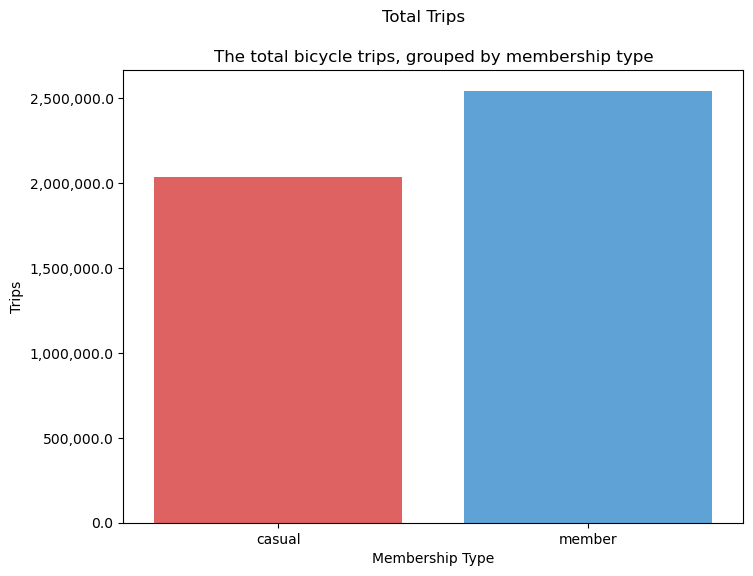

In [15]:
colors = ["#f44d4d", "#4aa5ea"]
sns.set_palette(sns.color_palette(colors))

fig, ax =  plt.subplots(figsize=(8, 6))
sns.countplot(x = all_trips_v2['member_casual'], data = all_trips_v2)
ax.set_xlabel('Membership Type')
ax.set_ylabel('Trips')
ax.set_title('The total bicycle trips, grouped by membership type')
fig.suptitle('Total Trips')
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: format(x, ',')))

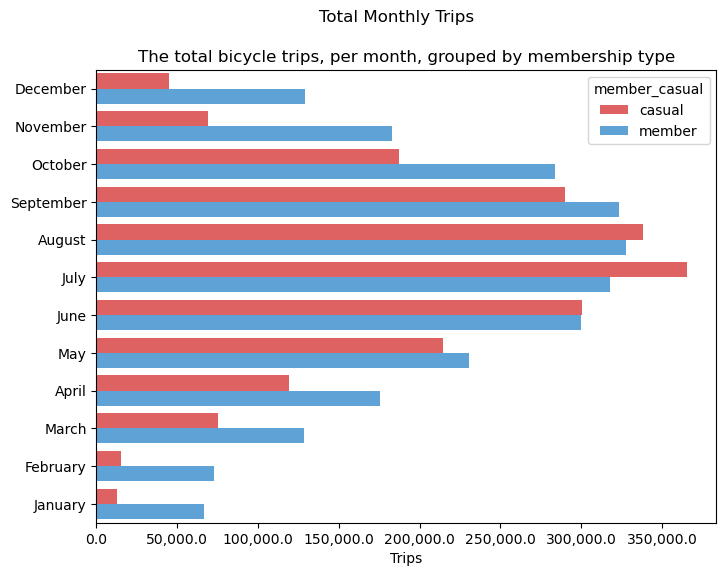

In [16]:
ordered_months = ['December', 'November', 'October', 'September', 'August',
                  'July', 'June', 'May', 'April', 'March', 'February','January']

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y='month', hue='member_casual', data = all_trips_v2, order = ordered_months)
ax.set_xlabel('Trips')
ax.set_ylabel('')
ax.set_title('The total bicycle trips, per month, grouped by membership type')
fig.suptitle('Total Monthly Trips')
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: format(x, ',')))

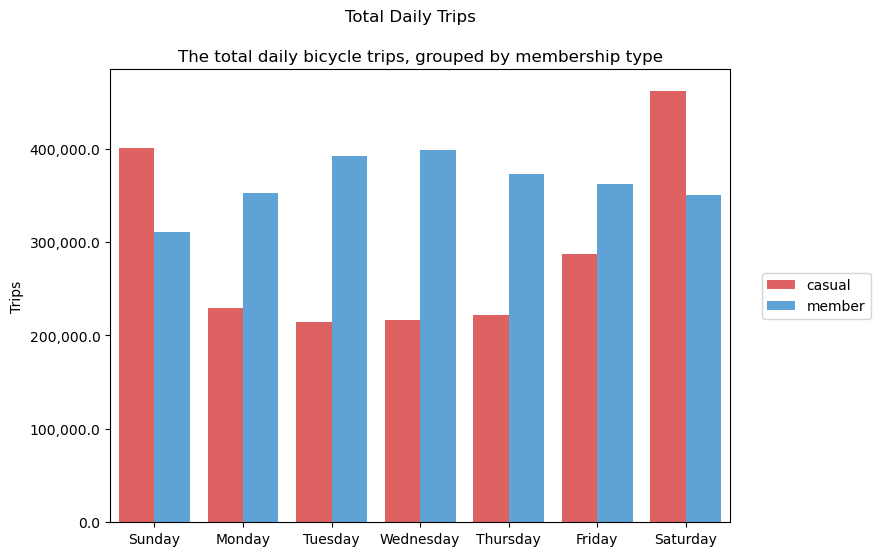

In [17]:
ordered_weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='day_of_the_week', hue='member_casual', data = all_trips_v2, order = ordered_weekday)
ax.set_xlabel('')
ax.set_ylabel('Trips')
ax.set_title('The total daily bicycle trips, grouped by membership type')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
fig.suptitle('Total Daily Trips')
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: format(x, ',')))

Text(0.5, 0.01, 'Hour of the day')

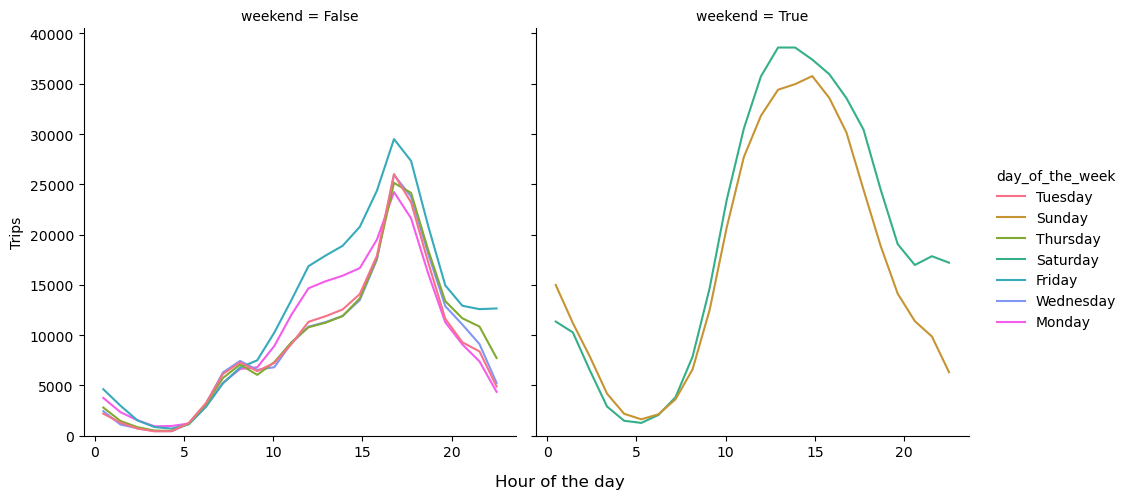

In [18]:
data_filtered = all_trips_v2[all_trips_v2['member_casual'] == 'casual']

g = sns.displot(data=data_filtered, 
                x = 'start_hour', 
                hue='day_of_the_week', 
                col='weekend', 
                bins=24, 
                element='poly', 
                fill = False)
g.set_xlabels('')
g.set_ylabels('Trips')
g.fig.supxlabel('Hour of the day')

Text(0.5, 0.98, 'Casual Members: weekday & weekend average, hourly trips by the hour')

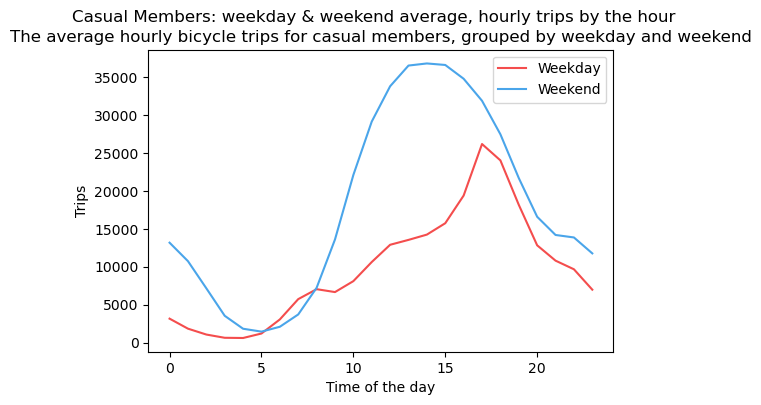

In [19]:
data_filtered = all_trips_v2[(all_trips_v2['member_casual'] == 'casual') & (all_trips_v2['weekday'] == True)]
data_filtered_weekday = data_filtered.groupby(by = ['start_hour', 'day_of_the_week']).count().reset_index()
data_filtered_weekday.groupby('start_hour').mean()

g = sns.lineplot(data = data_filtered_weekday,
            x = 'start_hour',
            y = 'ride_id',
            err_style=None,
            label = 'Weekday')

data_filtered = all_trips_v2[(all_trips_v2['member_casual'] == 'casual') & (all_trips_v2['weekend'] == True)]
data_filtered_weekend = data_filtered.groupby(by = ['start_hour', 'day_of_the_week']).count().reset_index()
data_filtered_weekend.groupby('start_hour').mean()

sns.lineplot(data = data_filtered_weekend,
            x = 'start_hour',
            y = 'ride_id',
            err_style=None,
            label = 'Weekend')
g.set_xlabel('Time of the day')
g.set_ylabel('Trips')
g.set_title('The average hourly bicycle trips for casual members, grouped by weekday and weekend')
g.figure.suptitle('Casual Members: weekday & weekend average, hourly trips by the hour')

Text(0.5, 0.98, 'Annual Member: total daily trips by the hour')

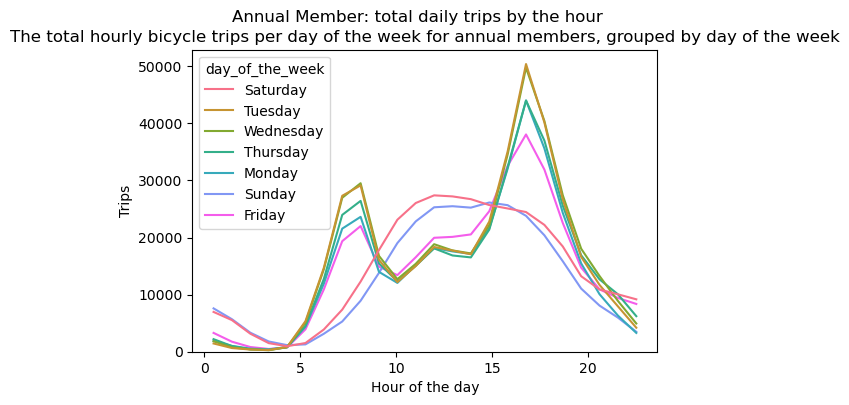

In [20]:
data_filtered = all_trips_v2[all_trips_v2['member_casual'] == 'member']

g = sns.histplot(data=data_filtered, 
                x = 'start_hour', 
                hue='day_of_the_week', 
                bins=24, 
                element='poly', 
                fill = False)
g.set_xlabel('Hour of the day')
g.set_ylabel('Trips')
g.set_title('The total hourly bicycle trips per day of the week for annual members, grouped by day of the week')
g.figure.suptitle('Annual Member: total daily trips by the hour')

Text(0.5, 0.98, 'Annual Members: weekday & weekend average hourly trips by the hour')

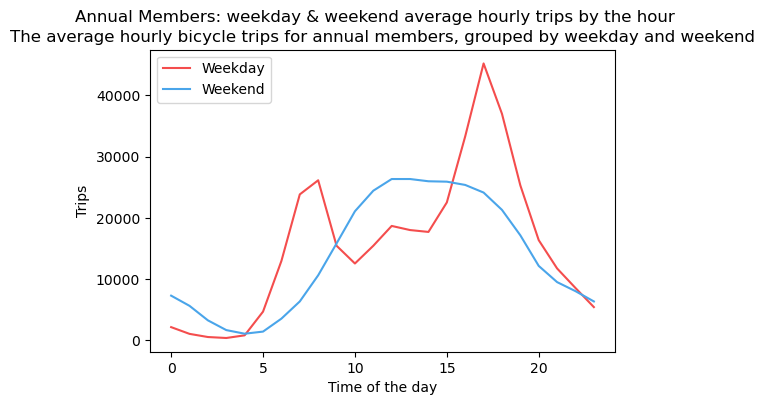

In [21]:
data_filtered = all_trips_v2[(all_trips_v2['member_casual'] == 'member') & (all_trips_v2['weekday'] == True)]
data_filtered_weekday = data_filtered.groupby(by = ['start_hour', 'day_of_the_week']).count().reset_index()
data_filtered_weekday.groupby('start_hour').mean()

g = sns.lineplot(data = data_filtered_weekday,
            x = 'start_hour',
            y = 'ride_id',
            err_style=None,
            label = 'Weekday')

data_filtered = all_trips_v2[(all_trips_v2['member_casual'] == 'member') & (all_trips_v2['weekend'] == True)]
data_filtered_weekend = data_filtered.groupby(by = ['start_hour', 'day_of_the_week']).count().reset_index()
data_filtered_weekend.groupby('start_hour').mean()

sns.lineplot(data = data_filtered_weekend,
            x = 'start_hour',
            y = 'ride_id',
            err_style=None,
            label = 'Weekend')
g.set_xlabel('Time of the day')
g.set_ylabel('Trips')
g.set_title('The average hourly bicycle trips for annual members, grouped by weekday and weekend')
g.figure.suptitle('Annual Members: weekday & weekend average hourly trips by the hour')

Text(0.5, 0.98, 'Ride Length"')

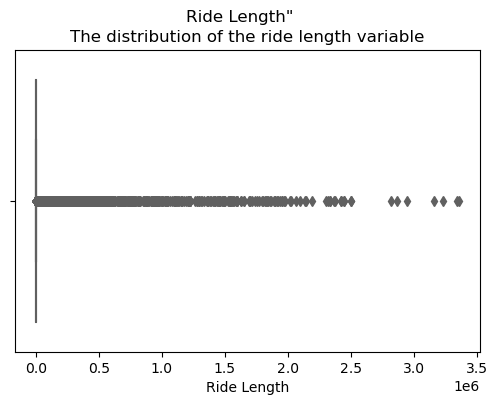

In [22]:
g = sns.boxplot(data = all_trips_v2, x='ride_length')
g.set_xlabel('Ride Length')
g.set_title('The distribution of the ride length variable')
g.figure.suptitle('Ride Length"')

Text(0.5, 0.98, 'Ride Length"')

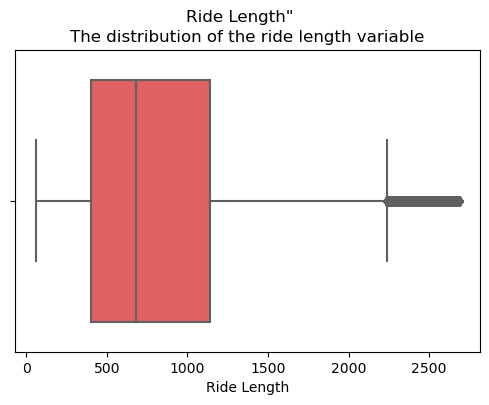

In [36]:
ride_length_array = np.array(all_trips_v2['ride_length'])
Q3 = np.quantile(all_trips_v2['ride_length'], 0.75)
trips_no_outliers = all_trips_v2[all_trips_v2['ride_length'] <= Q3 + 1.5 * iqr(ride_length_array)]

g = sns.boxplot(data = trips_no_outliers, x='ride_length')
g.set_xlabel('Ride Length')
g.set_title('The distribution of the ride length variable')
g.figure.suptitle('Ride Length"')

Text(0.5, 0, 'Ride Length')

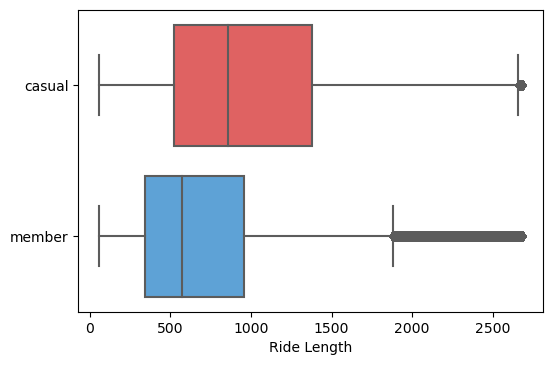

In [41]:
g = sns.boxplot(data=trips_no_outliers, x='ride_length', y='member_casual')
g.set_ylabel('')
g.set_xlabel('Ride Length')

Text(0.5, 0.98, 'Average trip duration per month')

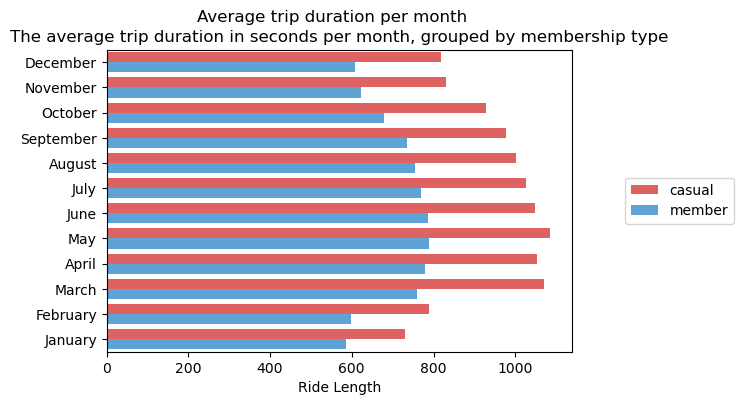

In [61]:
x = trips_no_outliers.groupby(by=['member_casual', 'month']).mean().reset_index()

g = sns.barplot(data = x,
               x='ride_length',
               y='month',
               hue='member_casual',
               order=ordered_months)
g.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
g.set_xlabel('Ride Length')
g.set_ylabel('')
g.set_title('The average trip duration in seconds per month, grouped by membership type')
g.figure.suptitle('Average trip duration per month')

Text(0.5, 0.98, 'Average trip duration per day of the week')

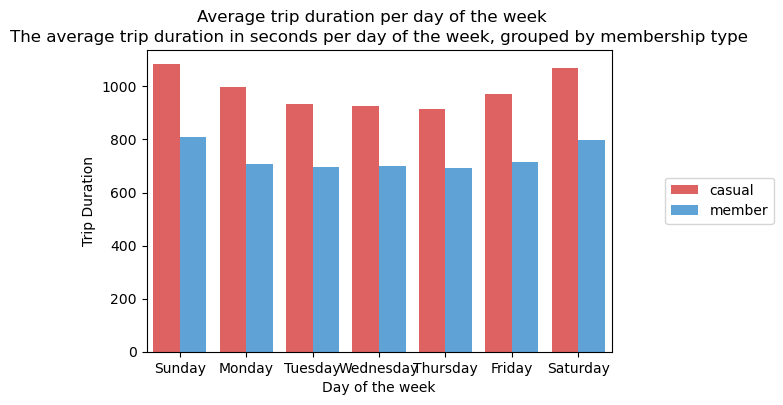

In [63]:
x = trips_no_outliers.groupby(by=['member_casual', 'day_of_the_week']).mean().reset_index()

g = sns.barplot(data = x,
               y='ride_length',
               x='day_of_the_week',
               hue='member_casual',
               order = ordered_weekday)
g.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
g.set_ylabel('Trip Duration')
g.set_xlabel('Day of the week')
g.set_title('The average trip duration in seconds per day of the week, grouped by membership type')
g.figure.suptitle('Average trip duration per day of the week')

Text(0.5, 0.98, 'Casual Members: Popular stations')

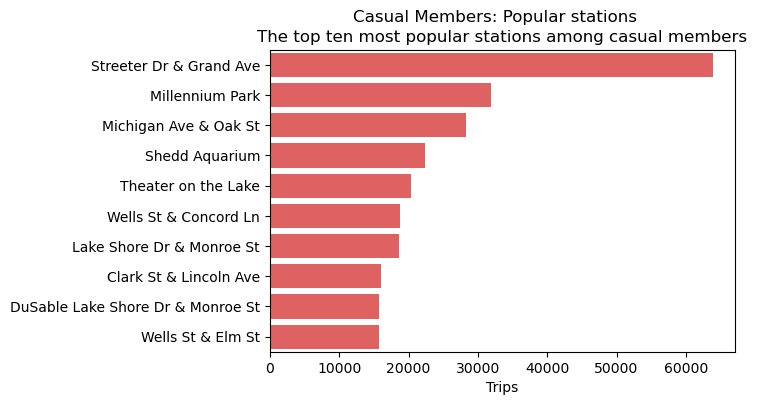

In [83]:
filtered_data = all_trips_v2[all_trips_v2['member_casual'] == 'casual']
filtered_data = filtered_data.groupby(by=['member_casual','start_station_name'])
filtered_data = filtered_data.count().reset_index().sort_values('ride_id', ascending=False)
filtered_data = filtered_data[:10]

g = sns.barplot(data=filtered_data, x='ride_id', y='start_station_name', color='#f44d4d')
g.set_xlabel('Trips')
g.set_ylabel('')
g.set_title('The top ten most popular stations among casual members')
g.figure.suptitle('Casual Members: Popular stations')

Text(0.5, 0.98, 'Annual Members: Popular stations')

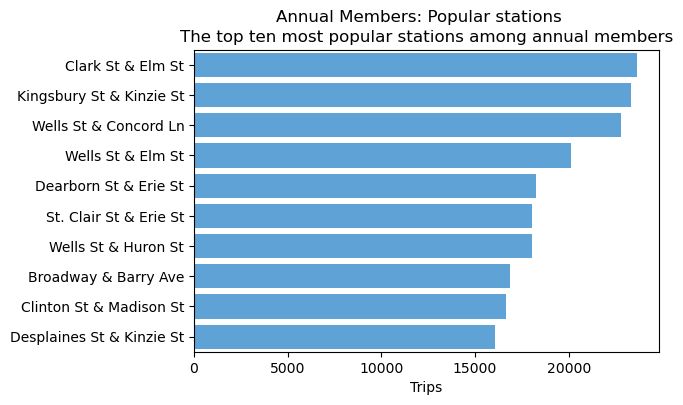

In [84]:
filtered_data = all_trips_v2[all_trips_v2['member_casual'] == 'member']
filtered_data = filtered_data.groupby(by=['member_casual','start_station_name'])
filtered_data = filtered_data.count().reset_index().sort_values('ride_id', ascending=False)
filtered_data = filtered_data[:10]

g = sns.barplot(data=filtered_data, x='ride_id', y='start_station_name', color='#4aa5ea')
g.set_xlabel('Trips')
g.set_ylabel('')
g.set_title('The top ten most popular stations among annual members')
g.figure.suptitle('Annual Members: Popular stations')